In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
volume = 100
space = np.linspace(0, 1, num=1000)
np.random.shuffle(space)
observations = np.sort(space[:volume])
linear_target = 2 + 3 * observations + np.random.normal(0, 0.3, size=volume)
non_linear_target = -1 + 2 * observations**2 + np.random.normal(0, 0.3, size=volume)

In [3]:
observations = np.reshape(observations, (volume, 1))
linear_target = np.reshape(linear_target, (volume, 1))
non_linear_target = np.reshape(non_linear_target, (volume, 1))

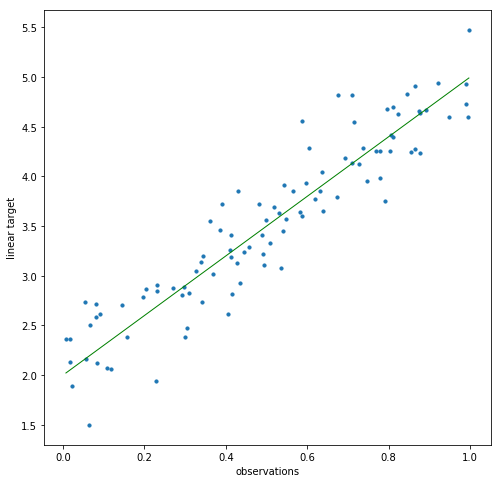

In [4]:
plt.rcParams['figure.figsize'] = 8, 8
plt.scatter(observations, linear_target, s=10)
plt.plot(observations, 2 + 3 * observations, c='g', linewidth=1)

plt.xlabel('observations')
plt.ylabel('linear target')
plt.show()

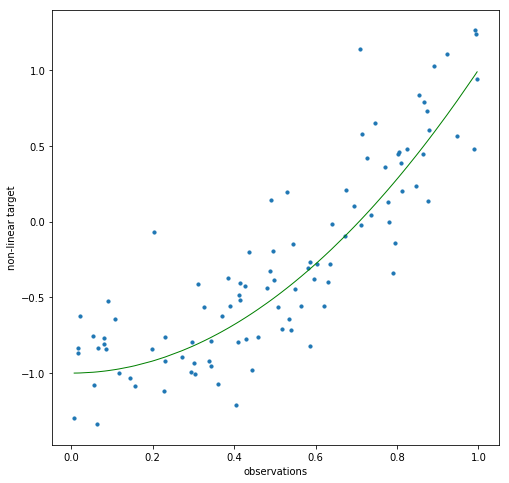

In [5]:
plt.scatter(observations, non_linear_target, s=10)
plt.plot(observations, -1 + 2 * observations**2, c='g', linewidth=1)

plt.xlabel('observations')
plt.ylabel('non-linear target')
plt.show()

In [6]:
class Regression:
    
    def __init__(self, learning_rate=0.05, iterations=5000, degree=1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.degree = degree

    def fit(self, observations, target):
        observe_number = observations.shape[0]
        for it in range(2, self.degree + 1):
            observations = np.c_[observations, observations[:, 0]**it]
        observations = np.c_[np.ones((observe_number, 1)), observations]
        
        feature_number = observations.shape[1]
        self.weights = np.reshape(np.random.uniform(-2, 2, feature_number), (feature_number, 1))
        
        for _ in range(self.iterations):
            target_pred = np.dot(observations, self.weights)
            residuals = target_pred - target
            gradient_vector = np.dot(observations.T, residuals)
            self.weights -= (self.learning_rate / observe_number) * gradient_vector
            
        return self

    def predict(self, observations):
        observe_number = observations.shape[0]
        for it in range(2, self.degree + 1):
            observations = np.c_[observations, observations[:, 0]**it]
        observations = np.c_[np.ones((observe_number, 1)), observations]
        
        return np.dot(observations, self.weights)

In [7]:
linear_regression = Regression()
linear_regression.fit(observations, linear_target);

polynomial_regression = Regression(degree=3)
polynomial_regression.fit(observations, non_linear_target);

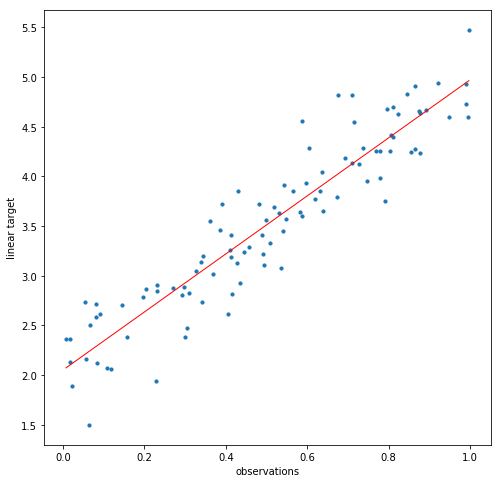

In [8]:
plt.scatter(observations, linear_target, s=10)
plt.plot(observations, linear_regression.predict(observations), c='r', linewidth=1)

plt.xlabel('observations')
plt.ylabel('linear target')
plt.show()

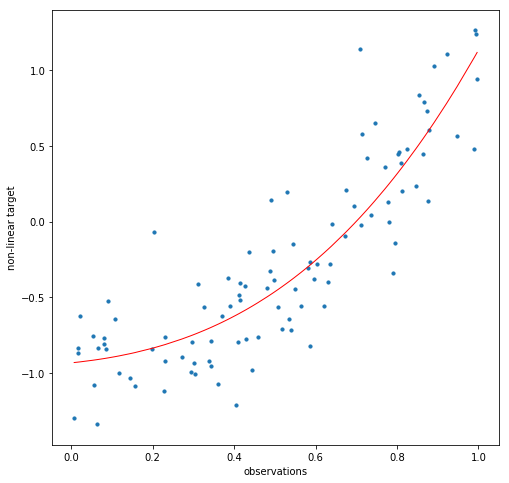

In [9]:
plt.scatter(observations, non_linear_target, s=10)
plt.plot(observations, polynomial_regression.predict(observations), c='r', linewidth=1)

plt.xlabel('observations')
plt.ylabel('non-linear target')
plt.show()